# trim_saddle_points
an example for the use of porespy.filters.trim_saddle_points

Removes peaks that are on a saddle in the distance transform (and are not actually a local peak).

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

## Create image and variables:

--------------------------------------------------------------------------------
RSA: Adding spheres of size 15
Initial volume fraction: 0.0
Dilating foreground features by sphere radius
Regenerating free_sites after 50 iterations
Regenerating free_sites after 63 iterations
Number of spheres inserted: 65
Final volume fraction: 0.5033888888888889


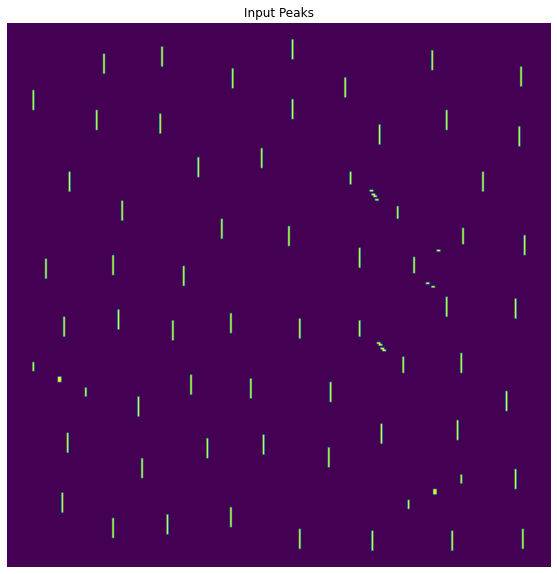

In [2]:
im = np.zeros([300, 300])
im = ps.generators.RSA(im, radius=15, volume_fraction=0.5)
dt = ps.filters.distance_transform_lin(im, axis = 1, mode = "both")
r_max = 4
footprint = None
peaks = ps.filters.find_peaks(dt, r_max=4, footprint=None)
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.title('Input Peaks')
plt.imshow(peaks)

#default values:
max_iters=10
verbose=1

## Apply filter function:
With different parameters

### max_iters

Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations reached, consider running again with a larger value of max_iters


Text(0.5, 1.0, 'max_iters = 2')

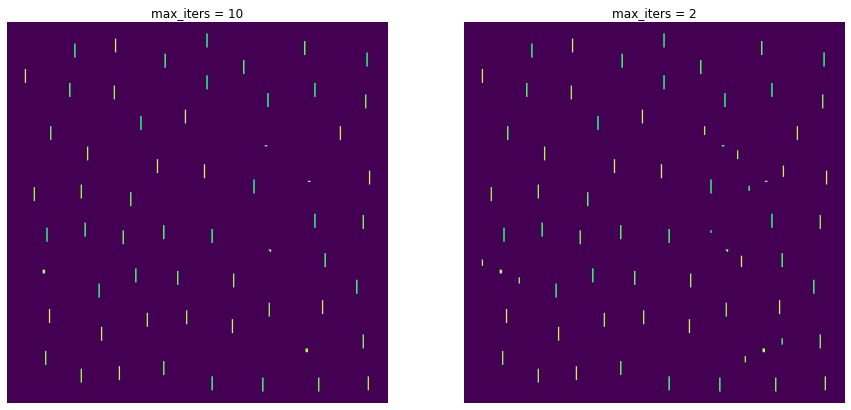

In [3]:
x = ps.filters.trim_saddle_points(peaks, dt, max_iters, verbose)
xx = ps.filters.trim_saddle_points(peaks, dt, 2, verbose)

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('max_iters = 10')
ax[1].set_title('max_iters = 2')

### verbose

Text(0.5, 1.0, 'verbose = 5')

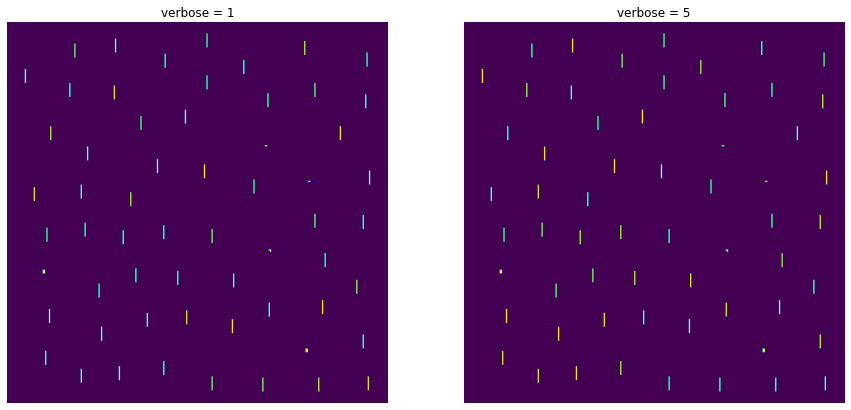

In [4]:
xx = ps.filters.trim_saddle_points(peaks, dt, max_iters, 5)

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('verbose = 1')
ax[1].set_title('verbose = 5')